In [1]:
data = [
    {'pk': 'material_001', 'same_group_pk': ['material_002', 'material_003']},
    {'pk': 'material_002', 'same_group_pk': ['material_004']},
    {'pk': 'material_004', 'same_group_pk': ['']},
    {'pk': 'material_005', 'same_group_pk': ['']}
]


In [2]:
import networkx as nx

def build_groups(data):
    G = nx.Graph()

    for item in data:
        pk = item['pk']
        G.add_node(pk)

        for related in item['same_group_pk']:
            if related:  # กันค่า ''
                G.add_edge(pk, related)

    # หา connected components (group ใหญ่)
    groups = [list(component) for component in nx.connected_components(G)]
    return G, groups


In [3]:
graph, groups = build_groups(data)

for i, group in enumerate(groups, 1):
    print(f"Group {i}: {group}")


Group 1: ['material_002', 'material_001', 'material_004', 'material_003']
Group 2: ['material_005']


In [6]:
import matplotlib.pyplot as plt

def visualize_graph(G):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)  # จัด layout อัตโนมัติ
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_size=2000,
        font_size=10
    )
    plt.show()


Matplotlib is building the font cache; this may take a moment.


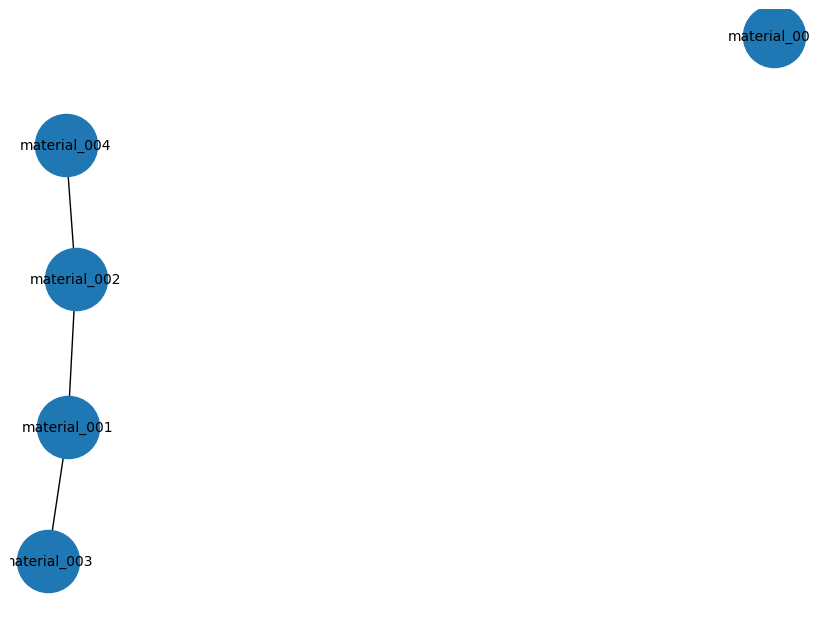

In [7]:
visualize_graph(graph)